<a href="https://colab.research.google.com/github/PyDanny21/27-Python-Projects-beginner-friendly/blob/main/Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Using Google Colab for Interactive Mathematics

Welcome to this interactive learning notebook!
In this session, we will explore Ordinary Differential Equations (ODEs) using Google Colab, a free online coding environment powered by Python.




## What Does “Interactive” Mean?

In this notebook, you will not just read mathematics --
you will experience it.

For example:

* You can change the initial  value of a differential equation,

* Adjust parameters, and Immediately see the effect on the graph,

* Repeat as many times as you like.

This helps you build intuition and visualize how ODEs behave in real systems.

## Why Use Code to Learn ODEs?

Traditionally, you solve ODEs by hand.
However, many real-world systems:

* may not have closed-form solutions,

* and might be  too complicated for manual methods.

With computational tools, you can:

1. simulate solutions,

2. test your ideas,

3. verify your manual work,

4. explore models from physics, biology, economics, and engineering.

The goal is not to replace your mathematical skills,
but to make your understanding deeper and more interactive.

# 1st-Order ODEs

In this section (Part 1), we focus on: First-Order ODEs

You will learn how to:

1. Define a first-order ODE in Python

2. Use numerical solvers like solve_ivp

3. Adjust parameters interactively through sliders

4. Interpret solution curves

5. Perform experiments by yourself

## ⭐ 1. Understanding First-Order Differential Equations

A first-order ODE is an equation of the form:

\begin{equation}
\dfrac{dt}{dy} =f(t,y)
\end{equation}


This means the rate of change of a quantity
𝑦  depends on the current time  𝑡,


Examples include:

1. exponential growth/decay

2. cooling/heating laws

3. population models

4. charging circuits in electronics

we would use numerical methods (thus inbulit python syntax) to approximate the solutions.

## ⭐ 2. Interactive Numerical Solver for First-Order ODEs

This tool lets students experiment with simple ODEs and instantly see how the solution changes.

In [ ]:
# These are the default modules needed in our python environment

#  run this cell first to proced to the other codes

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown


# Example 1: Popultion Growth

Population growth is one of the most important real-world examples of how differential equations describe change. It connects mathematics with biology, ecology, economics, public health, and even national planning.



In simple terms:

Population growth describes how the number of individuals in a population changes over time.

But this change is controlled by many factors, such as:

* birth  and death rates

* food supply and space (carrying capacity)

* diseases and some environmental conditions

Mathematics helps us model these factors so we can predict future behavior.

Mathematical representation in first order ODE can be written as;
    \begin{equation}
        \frac{dN}{dt} = rN
    \end{equation}

Where
   * N = population size
   * t = time
   * r = growth rate constant(positive for growth, negative for decay)

Has solution of the form : VERIFY

\begin{equation}
N(t)= Noe^{rt}
\end{equation}

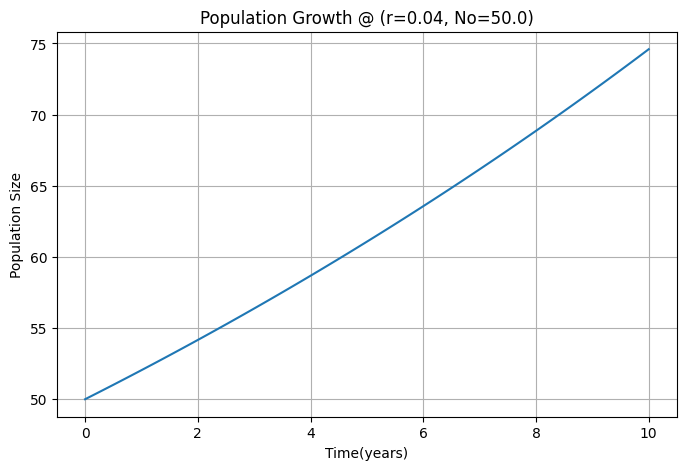

In [ ]:

# Run cell Code to solve the population ode
# slide over the parameters to see graph display

"""
 Qtn: Estimate the population size  given initial population size (𝑁0)  to be 10
 , with growth rate constant(r) as 0.05 wihtin the time interval(t) of 10years.
"""

r_given=4
N0_given=5000
T_given=10

# Define the function that will be interactively controlled
# with the parameters to vary
def interactive_population_growth_plot(r, N0):

   # define ODE function
    def dNdt(N, t):
        return r * N

    # Time span (can be fixed or also made interactive)
    t_span = np.linspace(0, T_given, 100)

    # Numerical solver
    Nt_solution = odeint(dNdt, N0, t_span)


# -------------------------------------------------
# Widgets for interactive plot
# -------------------------------------------------

    # Visualization
    plt.figure(figsize=(8, 5))
    plt.plot(t_span, Nt_solution)
    plt.xlabel('Time(years)')
    plt.ylabel('Population Size')
    plt.title(f'Population Growth @ (r={r:.2f}, No={N0})')
    plt.grid(True)
    plt.show()

interact(
    interactive_population_growth_plot,
    r = FloatSlider(min=-5, max=5, step=0.05, value=r_given, description="growth rate (r)"),
    N0 = FloatSlider(min=0, max=6000, step=10, value=N0_given, description="Initial Population (N0)")
);

## ⭐ How Students Should Use This Interactive Tool


1. Change the initial values given

2. Observe how  the conditions affect the direction of growth/decay



### Question:

Based on the observations from the population growth model's interactions:

1.  What happens to the population if the growth rate `r` is greater than 0 (`r > 0`)?
2.  What happens to the population if the growth rate `r` is less than 0 (`r < 0`)?

**run the code below to make a choice**

<!-- 1. If r>0: **population grows without limit**

2. If r<0: **population declines** -->

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Question 1
q1 = widgets.Dropdown(
    options=[
        ('Select an answer...', None),
        ('The population increases', 'increase'),
        ('The population decreases', 'decrease'),
    ],
    description='Q1: What happens to the population if the growth rate r > 0',
    style={'description_width': '500px'},
    layout=widgets.Layout(width='400px')
)

# Question 2
q2 = widgets.Dropdown(
    options=[
        ('Select an answer...', None),
        ('The population increases', 'increase'),
        ('The population decreases', 'decrease'),
    ],
    description='Q2: What happens to the population if the growth rate r < 0',
    style={'description_width': '500px'},
    layout=widgets.Layout(width='400px')
)

# Output area
out = widgets.Output()

def check_answers(change):
    with out:
        out.clear_output()
        print("Results:")
        print("---------")

        # Q1
        if q1.value == 'increase':
            print("Q1 correct: Population increases when r > 0.")
        elif q1.value == 'decrease':
            print("Q1 incorrect.")

        # Q2
        if q2.value == 'decrease':
            print("Q2 correct: Population decreases when r < 0.")
        elif q2.value == 'increase':
            print("Q2 incorrect.")

# Button to check answers
check_btn = widgets.Button(description="Check Answers")
check_btn.on_click(check_answers)

# Display everything
display(q1, q2, check_btn, out)


Dropdown(description='Q1: What happens to the population if the growth rate r > 0', layout=Layout(width='400px…

Dropdown(description='Q2: What happens to the population if the growth rate r < 0', layout=Layout(width='400px…

Button(description='Check Answers', style=ButtonStyle())

Output()

# Example 2: Logistic Growth (Limited Resources)

In real life:

* food becomes scarce

* space becomes limited

* competition increases

So populations cannot grow forever.
They rise quickly at first, then slow down, and eventually settle at a maximum sustainable level called the carrying capacity,

The governing differential equation is:

$$
\frac{dP}{dt} = r P \left(1 - \frac{P}{K}\right)
$$

where:
- $P(t)$ is the quantity at time \(t\)
- $r$ is the intrinsic growth rate
- K is the carrying capacity

The analytical solution is:

$$
P(t) = \frac{K}{1 + A e^{-rt}}, \quad \text{where } A = \frac{K - P_0}{P_0}
$$
	​

Let's set up an initial scenario for our logistic growth model:

*   **Initial Growth Rate**: `0.1`
*   **Carrying Capacity**: `100`
*   **Initial Population**: `10`
*   **Time Duration**: `10` years

In [ ]:

# Run the code below for interactive preview

r_given=0.1
K_given=100
P0_given=10
T_given=10

# Define the function that will be interactively controlled
def interactive_logistic_growth(r, K, P0, T):

    # ODE function: odeint expects func(y, t, ...) where y is the dependent variable (P here)
    def dPdt(P, t, r, K):
      return r * P * (1 - P/K)

    # Time span (use the interactive T)
    t_span = np.linspace(0, T, 100)

    # Numerical solver: pass r and K as additional arguments to dPdt
    Pt_solution = odeint(dPdt, P0, t_span, args=(r, K))


# -------------------------------------------------
# Widgets for interactive plot
# -------------------------------------------------

    # Visualization
    plt.figure(figsize=(8,5))
    plt.plot(t_span, Pt_solution, color='blue', linewidth=2, label='P(t): Logistic Growth')
    plt.axhline(K, color='red', linestyle='--', label='Carrying Capacity K')
    plt.title(f'Logistic Growth Model (r={r:.2f}, K={K:.0f}, Po={P0:.0f})') # Updated title format
    plt.xlabel('Time')
    plt.ylabel('Quantity P(t)')
    plt.legend()
    plt.grid(True)
    plt.show()
# Interactive sliders
interact(
    interactive_logistic_growth,
    r=FloatSlider(value=r_given, min=0.01, max=1.0, step=0.01, description='r (Growth Rate)'),
    K=FloatSlider(value=K_given, min=10, max=200, step=10, description='K (Capacity)'),
    P0=FloatSlider(value=P0_given, min=10, max=200, step=10, description='P₀ (Initial Value)'),
    T=FloatSlider(value=T_given, min=10, max=100, step=10, description='Time Horizon')
);

interactive(children=(FloatSlider(value=0.1, description='r (Growth Rate)', max=1.0, min=0.01, step=0.01), Flo…

## ⭐ How Student Should Use this  interactive sliders,

students can:

- change r, K ,𝑃0 : and see how it affects the early behaviour


Observe  what happens and make a choice  ,
- When $P \ll K$,
- As $P \to K$,  thus P approaches K
- When  𝑃 =𝐾

<!-- , Thus, the population stabilizes at -->
<!-- 𝐾. This is called a stable equilibrium. -->

- NB: The curve is *S-shaped (sigmoidal)*: initially steep, then flattens at equilibrium.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# --- Dropdown options ---
options = [
    ('Select an answer...', None),
    ('Growth is nearly exponential', 'exp'),
    ('Growth slows down', 'slow'),
    ('Growth stops / stabilizes', 'stop')
]

# --- Questions ---
q1 = widgets.Dropdown(
    options=options,
    description='P << K:',
    style={'description_width':'100px'},
    layout=widgets.Layout(width='450px')
)

q2 = widgets.Dropdown(
    options=options,
    description='P → K:',
    style={'description_width':'100px'},
    layout=widgets.Layout(width='450px')
)

q3 = widgets.Dropdown(
    options=options,
    description='P = K:',
    style={'description_width':'100px'},
    layout=widgets.Layout(width='450px')
)

# --- Output area ---
out = widgets.Output()

# --- Correct answers ---
correct_answers = {
    q1: 'exp',
    q2: 'slow',
    q3: 'stop'
}

def check_answers(b):
    with out:
        out.clear_output()
        print("Results:")
        print("---------")

        # Check each dropdown
        for i, (q, correct) in enumerate(correct_answers.items(), start=1):
            if q.value == correct:
                print(f"Q{i} correct.")
            elif q.value is None:
                print(f"Q{i} not answered.")
            else:
                print(f"Q{i} incorrect.")

# Button to check answers
check_btn = widgets.Button(description="Check Answers")
check_btn.on_click(check_answers)

# Display
display(q1, q2, q3, check_btn, out)


Dropdown(description='P << K:', layout=Layout(width='450px'), options=(('Select an answer...', None), ('Growth…

Dropdown(description='P → K:', layout=Layout(width='450px'), options=(('Select an answer...', None), ('Growth …

Dropdown(description='P = K:', layout=Layout(width='450px'), options=(('Select an answer...', None), ('Growth …

Button(description='Check Answers', style=ButtonStyle())

Output()

## Example 3: Newton's Law of Cooling

Newton's Law of Cooling is a fundamental principle describing how objects cool down (or heat up) when exposed to a surrounding environment at a different temperature.

**Key Idea:** The rate at which an object's temperature changes is proportional to the difference between its own temperature and the ambient (surrounding) temperature.

Mathematically, this is expressed as:

$$ \frac{dT}{dt} = -k(T - T_{env}) $$

Where:
- $T(t)$ is the temperature of the object at time $t$
- $T_{env}$ is the constant ambient temperature of the surroundings
- $k$ is a positive constant (the cooling/heating rate constant), which depends on the properties of the object and the nature of heat transfer (conduction, convection, radiation).




This model is foundational for understanding processes like:
- Cooling of a hot beverage
- Temperature stabilization of electronic components
- Determining time of death in forensic science

In [ ]:
from matplotlib.cbook import to_filehandle
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# -------------------------------------------
# Newton Cooling Differential Equation
# dT/dt = -k (T - T_env)
# -------------------------------------------

T_env_given = 25  # constant environmental temperature
T0_given= 20 #initail body temp
k_given=0.1   #cooling rate


# -------------------------------------------
# Interactive Solver and Plot
# -------------------------------------------

def solve_cooling(k, T0,T_env):

    def newton_cooling(t, T, k):
        return -k * (T - T_env)

    t_span = (0, 60)  # simulate for 60 minutes
    t_eval = np.linspace(0, 60, 300)

    sol = solve_ivp(newton_cooling, t_span, [T0], t_eval=t_eval, args=(k,))

    plt.figure(figsize=(8, 5))
    plt.plot(sol.t, sol.y[0], linewidth=2, label="Object Temperature")
    plt.axhline(T_env, color='red', linestyle='--', label="Environment Temperature")
    plt.title("Newton’s Law of Cooling: Interactive Simulation")
    plt.xlabel("Time (minutes)")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.legend()
    plt.show()

# -------------------------------------------
# Widgets
# -------------------------------------------

interact(
    solve_cooling,
    k = FloatSlider(min=0.01, max=0.5, step=0.01, value=k_given, description="Cooling k"),
    T0 = FloatSlider(min=0, max=100, step=1, value=T0_given, description="Initial T₀"),
    T_env=FloatSlider(min=0, max=100, step=1, value=T_env_given, description="Environment Temp")
);

interactive(children=(FloatSlider(value=0.1, description='Cooling k', max=0.5, min=0.01, step=0.01), FloatSlid…

## ⭐ How Student Should Use this  interactive sliders


As you change parameter values, examine what happens

1. if the object is hotter than its surroundings, Thus  ( $T_0 > T_{env}$ ),
 <!-- * $T - T_{env}$ is positive, and the derivative $\frac{dT}{dt}$ will be negative, meaning the object cools down. -->



2. If the object is cooler than it surroundingd:   ( $T_0 < T_{env}$ ),
<!-- *  $T - T_{env}$ is negative, making $\frac{dT}{dt}$ positive, so the object heats up. -->


<!-- The larger the temperature difference, the faster the rate of change. -->

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# --- Dropdown options ---
options = [
    ('Select an answer...', None),
    ('Temperature decreases (cools toward T_env)', 'cool'),
    ('Temperature increases (warms toward T_env)', 'warm'),
]

# --- Questions ---
q1 = widgets.Dropdown(
    options=options,
    description='T > T_env:',
    style={'description_width':'120px'},
    layout=widgets.Layout(width='500px')
)

q2 = widgets.Dropdown(
    options=options,
    description='T < T_env:',
    style={'description_width':'120px'},
    layout=widgets.Layout(width='500px')
)

# --- Output area ---
out = widgets.Output()

# --- Correct answers ---
correct_answers = {
    q1: 'cool',   # If object is hotter than surroundings → it cools
    q2: 'warm'    # If object is colder than surroundings → it warms
}

def check_answers(b):
    with out:
        out.clear_output()
        print("Results:")
        print("---------")

        for i, (q, correct) in enumerate(correct_answers.items(), start=1):
            if q.value == correct:
                print(f"Q{i} correct.")
            elif q.value is None:
                print(f"Q{i} not answered.")
            else:
                print(f"Q{i} incorrect.")

# Button to check answers
check_btn = widgets.Button(description="Check Answers")
check_btn.on_click(check_answers)

# Display
display(q1, q2, check_btn, out)


Dropdown(description='T > T_env:', layout=Layout(width='500px'), options=(('Select an answer...', None), ('Tem…

Dropdown(description='T < T_env:', layout=Layout(width='500px'), options=(('Select an answer...', None), ('Tem…

Button(description='Check Answers', style=ButtonStyle())

Output()

## Example 4: Exponential Decay

Exponential decay describes a process where a quantity decreases at a rate proportional to its current value.
In simple words:

The more you have, the faster you lose it.
The less you have, the slower you lose it.


The differential equation is:
$$\dfrac{dD}{dt} =−kD $$

Interpretation:

- $k>0$ controls how fast it decays

- the negative sign means "loss"


With analytic solution

$$D(t)= D_0 e^{(-k * t)} $$

Applicable in modeling
-  waste decay:

In [ ]:


# Given values
k_given = 0.1      # Decay rate
D0_given = 10      # Initial waste amount
T_given = 10       # Time duration

# -------------------------------------------
# Interactive Decay Plot
# -------------------------------------------

def interactive_decay_plot(k, D0):

    # ODE model: dD/dt = -k * D
    def dDdt(D, t, k):
        return -k * D

    # Time vector
    t = np.linspace(0, T_given, 100)

    # Solve ODE
    D_solution = odeint(dDdt, D0, t, args=(k,))

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(t, D_solution, linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Waste Amount (D)')
    plt.title(f'Decay of Waste Over Time (k={k:.2f}, D₀={D0})')
    plt.grid(True)
    plt.show()

# -------------------------------------------
# Interactivity
# -------------------------------------------

interact(
    interactive_decay_plot,
    k = FloatSlider(min=0.01, max=0.9, step=0.05, value=k_given, description="Decay rate (k)"),
    D0 = FloatSlider(min=0, max=100, step=5, value=D0_given, description="Initial Amount (D₀)")
);


interactive(children=(FloatSlider(value=0.1, description='Decay rate (k)', max=0.9, min=0.01, step=0.05), Floa…


## ⭐ How Student Should Use this  interactive sliders,

Adjust the parameter (k )to  explore faster/slower decay



In [ ]:
import ipywidgets as widgets
from IPython.display import display

# --- Dropdown options ---
options = [
    ("Select an answer...", None),
    ("Decay becomes faster", "faster"),
    ("Decay becomes slower", "slower"),
    ("No change in decay speed", "none")
]

# --- Questions ---
q1 = widgets.Dropdown(
    options=options,
    description='Increase k:',
    style={'description_width':'120px'},
    layout=widgets.Layout(width='450px')
)

q2 = widgets.Dropdown(
    options=options,
    description='Decrease k:',
    style={'description_width':'120px'},
    layout=widgets.Layout(width='450px')
)

# --- Output area ---
out = widgets.Output()

# --- Correct answers ---
correct_answers = {
    q1: "faster",   # Larger k → faster decay
    q2: "slower"    # Smaller k → slower decay
}

def check_answers(b):
    with out:
        out.clear_output()
        print("Results:")
        print("---------")

        for i, (q, correct) in enumerate(correct_answers.items(), start=1):
            if q.value == correct:
                print(f"Q{i} correct.")
            elif q.value is None:
                print(f"Q{i} not answered.")
            else:
                print(f"Q{i} incorrect.")

# --- Button ---
check_btn = widgets.Button(description="Check Answers")
check_btn.on_click(check_answers)

# --- Display ---
display(q1, q2, check_btn, out)


Dropdown(description='Increase k:', layout=Layout(width='450px'), options=(('Select an answer...', None), ('De…

Dropdown(description='Decrease k:', layout=Layout(width='450px'), options=(('Select an answer...', None), ('De…

Button(description='Check Answers', style=ButtonStyle())

Output()

# Question Time

Run the codes below to render question

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1. Define the question and options
question_text = "Which of these is NOT a first-order ODE example from this notebook?"
options = [
    "Population Growth",
    "Logistic Growth",
    "Newton's Law of Cooling",
    "Waste Decay (Exponential Decay)",
    "Simple Harmonic Motion"
]
correct_answer = "Simple Harmonic Motion"

# 2. Create RadioButtons for the options
radio_buttons = widgets.RadioButtons(
    options=options,
    description='Choose one:',
    disabled=False
)

# 3. Create a Button for submission
submit_button = widgets.Button(
    description='Submit Answer',
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to submit your answer'
)

# 4. Create an Output widget to display feedback
output_feedback = widgets.Output()

# 5. Define the function to check the answer and provide feedback
def check_answer(b):
    with output_feedback:
        clear_output()
        if radio_buttons.value == correct_answer:
            print("Correct! Simple Harmonic Motion is typically a second-order ODE.")
        else:
            print(f"Incorrect. The correct answer is '{correct_answer}'.")

# Attach the check_answer function to the button's on_click event
submit_button.on_click(check_answer)

# Display the widgets
display(widgets.VBox([widgets.HTML(value=f"<b>{question_text}</b>"), radio_buttons, submit_button, output_feedback]))


# Section 2: 2nd order ODEs

This section explores 2nd order ODEs, both homogenous and non-homogenous

### 👉 Continue to the next part:
[Click here to open the next notebook](https://colab.research.google.com/drive/1hdE3H2A3MPTjmpMU0-hLpINBpjYqJPpc#scrollTo=d92tdnmMTyCy)


